In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
###### Day 2 Activity 5
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
###### Day 2 Activity 5
# Pring all of the classes mapped to the Base 
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
###### Day 2 Activity 5
Measurement = Base.classes.measurement 
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
###### Day 2 Activity 5
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
###### Day 3 Activity 2 (there are other ways, but this example is very specific)
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

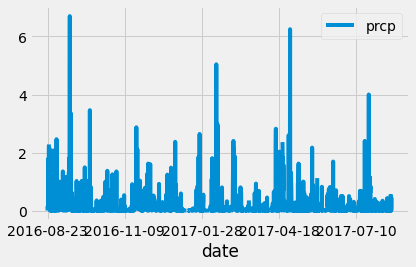

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
###### you can just look at the data to get this point OR use python to find it


# Calculate the date one year from the last date in data set.
###### This is also found in the data lecture #Day 3 Activity 2
###### Look for the code using timedelta

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores 
###### you can do this with session.query and .filter or with execute(SQL)
year_ago_data = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()

# date_str = "14"
# session.query(Measurement.date).\
#     filter(func.strftime("%d", Measurement.date) == date_str).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
###### you can use pd.read_sql.  If you choose to use .filter you will need to pd.DataFrame()
result_df = pd.DataFrame(year_ago_data,columns=['prcp','date'])
result_df
# index_df = current_df_name.set_index(["column name that I'm setting for the df"])

# Sort the dataframe by date
###### this is found throughout, but Day 3 Activity 3 has a specific example
#done above 

# # Use Pandas Plotting with Matplotlib to plot the data
# # ######Day 3 Activity 3 has a specific example
# df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
# df.set_index('stock', inplace=True)
# #need to decide what x and y are 
result_df.plot(x='date', y='prcp')
plt.tight_layout()
plt.show
#need to rotate the text. use rotation in the result_df.plot

result_df.set_index('date', inplace=True)



In [27]:
# testing out the for loop in the jupyter notebook 
dictionary_two = {}
for key,value in year_ago_data:
        dictionary_two[key]=value
print(dictionary_two)

{0.0: '2017-08-23', 0.15: '2017-08-09', 0.05: '2017-08-17', None: '2017-08-21', 0.02: '2017-08-21', 1.79: '2017-02-07', 0.7: '2017-07-20', 0.08: '2017-08-23', 2.15: '2016-08-24', 2.28: '2016-08-24', 1.22: '2016-08-24', 1.45: '2017-03-02', 0.21: '2017-07-17', 0.06: '2017-08-18', 0.11: '2017-07-25', 0.03: '2017-07-25', 0.04: '2017-08-04', 0.01: '2017-08-20', 0.18: '2017-07-07', 0.12: '2017-08-16', 0.14: '2017-08-12', 0.6: '2017-05-15', 2.07: '2016-08-28', 0.17: '2017-06-20', 0.35: '2017-06-17', 0.9: '2017-04-15', 0.13: '2017-08-17', 0.1: '2017-08-08', 0.25: '2017-08-02', 0.24: '2017-06-18', 2.46: '2016-08-31', 0.19: '2017-06-21', 0.07: '2017-08-16', 1.0: '2017-05-14', 0.74: '2017-06-11', 0.44: '2017-05-23', 0.23: '2017-07-29', 0.16: '2017-07-17', 1.35: '2017-04-22', 0.22: '2017-08-14', 0.29: '2017-05-28', 0.09: '2017-08-19', 1.16: '2017-04-21', 0.3: '2017-07-30', 0.31: '2017-06-20', 1.04: '2017-04-30', 0.37: '2017-05-25', 0.32: '2017-08-15', 0.46: '2017-05-18', 0.34: '2017-08-08', 1.2: '

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
###### Pandas Day 1 Activity 4
result_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
#####  You can use session.query() or just plain SQL for this.

total_stations = session.query(func.count(Station.station)).all()
print(total_stations)

[(9,)]


In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#####  You can use session.query() or just plain SQL for this.

#There was an error with the order by and also this doesn't list out both stations and counts. I think those are just counts? 

active_stations = session.query(func.count(Measurement.station), Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

active_stations

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [31]:
#Results only say none 

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#####  You can use session.query() or just plain SQL for this.

# this returned "None"
low_high_average = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station=='USC00519281').all()     

# this got error: "ArgumentError: SQL expression for WHERE/HAVING role expected, got 2772."
# low_high_average = session.query(func.max(Measurement.tobs)).\
#                 filter(active_stations[0][0]).all()  
low_high_average




[(54.0, 85.0, 71.66378066378067)]

In [32]:
# Need to figure out the code above before this cell will work

#Interface error
#Note: the code above had interface error if I didn't have [0][0]. I'm assuming the interface error is because of trying to call the entire list instead of just one
#But why did adding [0][0] not fix it? 

#tobs is the temperature observation 
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#####  You can use session.query() or just plain SQL for this.
#####  The plot is similar to the one above

#Session query 
twelve_months_station = session.query(Measurement.tobs).\
                                filter(Measurement.station=='USC00519281').\
                                filter(Measurement.date >= year_ago).\
                                order_by(Measurement.date.desc()).all()
twelve_months_station_df = pd.DataFrame(twelve_months_station)
twelve_months_station_df.head()


,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


Text(0, 0.5, 'Count')

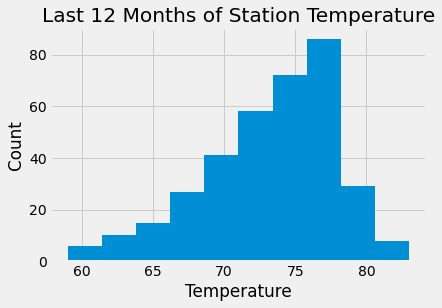

In [33]:
#Need to figure out cell above before this will work 

#Plot the histogram
#Where do I put bins=12?
plt.hist(twelve_months_station_df)
plt.title('Last 12 Months of Station Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')

# Close session

In [ ]:
# Close Session
session.close()